# DATA AUGMENTATION

---
---



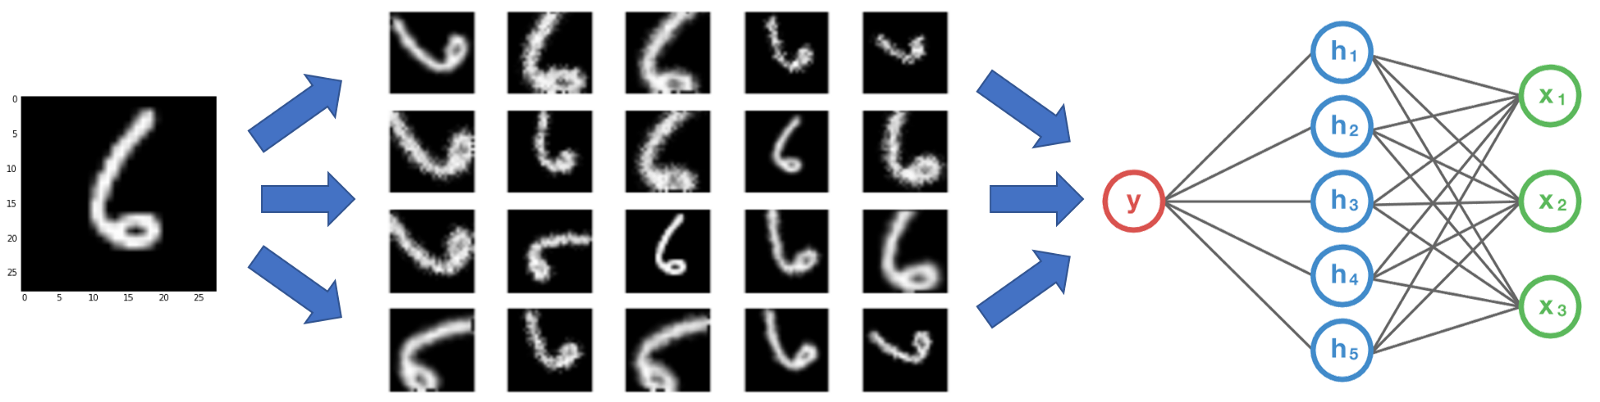

**Data augmentation is a form of regularization,enabling our network to generalize better to our testing/validation set.**


---
Not applying data augmentation at training caused overfitting
While apply data augmentation allowed for smooth training, no overfitting, and higher accuracy/lower loss






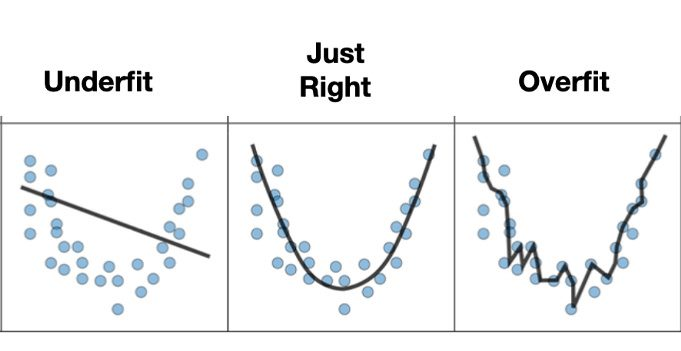

**Our goal when applying data augmentation is to increase the generalizability of the model.**

Given that our network is constantly seeing new, slightly modified versions of the input data, the network is able to learn more robust features.

At testing time we do not apply data augmentation and simply evaluate our trained network on the unmodified testing data — in most cases, you’ll see an increase in testing accuracy, perhaps at the expense of a slight dip in training accuracy.

A model trained on this modified, augmented data is more likely to generalize to example data points not included in the training set.

In the context of computer vision, data augmentation lends itself naturally.

For example, we can obtain augmented data from the original images by applying simple geometric transforms, such as random:

Translations
Rotations
Changes in scale
Shearing
Horizontal (and in some cases, vertical) flips

Applying a (small) amount of the transformations to an input image will change its appearance slightly, but it does not change the class label — thereby making data augmentation a very natural, easy method to apply for computer vision tasks.


# Three types of data augmentation


---



**Type #1: Dataset generation and expanding an existing dataset (less common)**


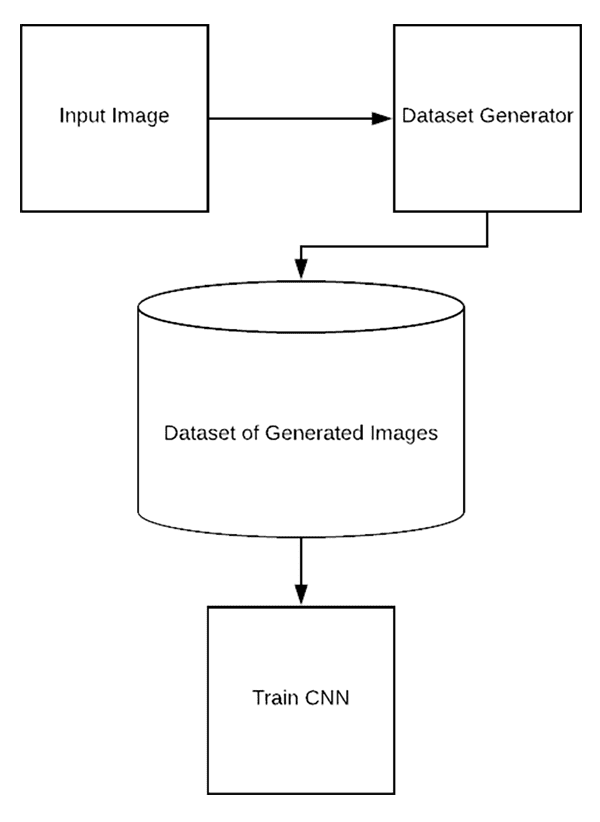

As you know machine learning models, and especially neural networks, can require quite a bit of training data — but what if you don’t have very much training data in the first place?

you only have one image and you want to apply data augmentation to create an entire dataset of images, all based on that one image.

To accomplish this task, you would:

Load the original input image from disk.
Randomly transform the original image via a series of random translations, rotations, etc.

Take the transformed image and write it back out to disk.

Repeat steps 2 and 3 a total of N times.

We get new images that can be used for training -----> from single input image.

we can do the same for 10's or 100's or 100's images for training.

*But there’s a problem with this approach — we haven’t exactly increased the ability of our model to generalize.*


Keep in mind that our neural network is only as good as the data it was trained on.

We cannot expect to train a NN on a small amount of data and then expect it to generalize to data it was never trained on and has never seen before.

**Type #2: In-place/on-the-fly data augmentation (most common)**

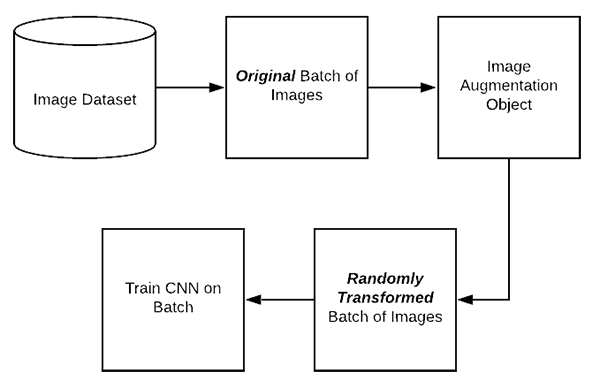




This type of data augmentation is what Keras’ ImageDataGenerator class implements.

Using this type of data augmentation we want to ensure that our network, when trained, sees new variations of our data at each and every epoch.

Process of applying in-place data augmentation:

Step #1: An input batch of images is presented to the ImageDataGenerator.


Step #2: The ImageDataGenerator transforms each image in the batch by a series of random translations, rotations, etc.


Step #3: The randomly transformed batch is then returned to the calling function.

There are two important points that I want to draw your attention to:

The ImageDataGenerator is not returning both the original data and the transformed data — the class only returns the randomly transformed data.
We call this “in-place” and “on-the-fly” data augmentation because this augmentation is done at training time (i.e., we are not generating these examples ahead of time/prior to training).

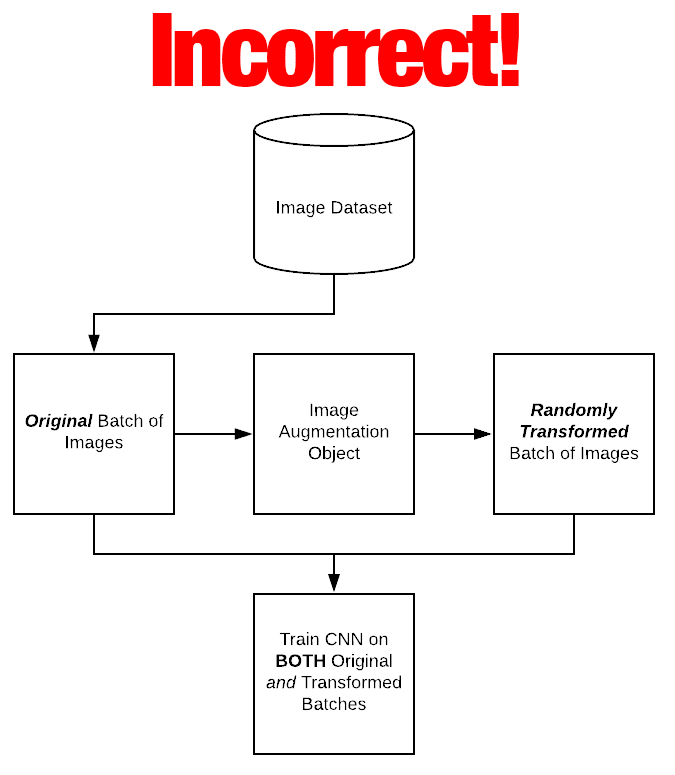

Here, ImageDataGenerator accepts an input batch of images, randomly transforms the batch, and then returns both the original batch and modified data — again, **this is not what the Keras ImageDataGenerator does. Instead, the ImageDataGenerator class will return just the randomly transformed data**

**Keep in mind that the entire point of the data augmentation technique described in this section is to ensure that the network sees “new” images that it has never “seen” before at each and every epoch.**

If we include the training data with augmented data then the network will 'see' the original data multiple times then there will be no use of the original data as the model will learn from it already.

Our Goal-->Increase the generalizability of the model.

To accomplish it we need to replace the original data with the augmented data.



**Type #3: Combining dataset generation and in-place augmentation**

The final type of data augmentation seeks to combine both dataset generation and in-place augmentation — you may see this type of data augmentation when performing behavioral cloning.

**Great Example-Self-driving car applications.**

Creating self-driving car datasets can be extremely time consuming and expensive — a way around the issue is to instead use video games and car driving simulators.

Video game graphics have become so life-like that it’s now possible to use them as training data.

Therefore, instead of driving an actual vehicle, you can instead:

Play a video game
Write a program to play a video game
Use the underlying rendering engine of the video game
…all to generate actual data that can be used for training.

Once you have your training data you can go back and apply Type #2 data augmentation (i.e., in-place/on-the-fly data augmentation) to the data you gathered via your simulation.

**The Keras ImageDataGenerator class is not an “additive” operation. It’s not taking the original data, randomly transforming it, and then returning both the original data and transformed data.**

**Instead, the ImageDataGenerator accepts the original data, randomly transforms it, and returns only the new, transformed data.**

11501568/11490434 [==============================] - 0s 0us/step


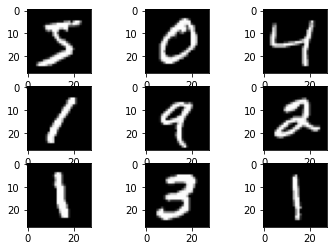

In [ ]:
# Plot images
from keras.datasets import mnist
from matplotlib import pyplot

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
    
# show the plot
pyplot.show()

* We need to reshape the dataset to 4 dimensional numpy array to be able to use it in keras .

* We can see that the datset iS 3 dimensional since x_train contains (6000,28,28) where 60000=no of images & (28,28)=size of each image.

* max range for sheer range and zoom range =0 to 1
* max range for rotation range =360 degree
* flip horizontal or vertical =mirror image= True or False
* shift =shift your image little bit (slightly pixels are been stretched when   we tried to do the shift either horizontally or vertically) we can give width_shift and height_shift(0 to 1).

whaterver we have specified will take place in whole dataset.
no of input images will be 60000,output will be twice ,it will apply whatever parameter we have given

**Applying Rotations**

* As per Keras documentation random is 50%
* Max range for rotation range = 360 degree

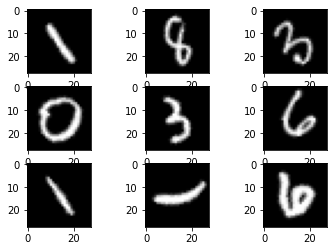

In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape our data to be in the forma [samples, width, height, color_depth]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Change datatype to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Create our image generator
# Define random rotation parameter to be 60 degrees
train_datagen = ImageDataGenerator(rotation_range=45)

# fit parameters from data
train_datagen.fit(x_train)

# configure batch size and retrieve one batch of images
for x_batch, y_batch in train_datagen.flow(x_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))# show the plot
    pyplot.show()
    break

**Applying Shearing and Zooming**

* max range for Shearing and Zooming = 0 to 1

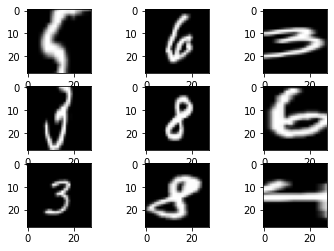

In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape our data to be in the forma [samples, width, height, color_depth]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Change datatype to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Create our image generator
# Define shearing and zooming parameters to be 0.5 each
train_datagen = ImageDataGenerator(shear_range=0.8,
                                   zoom_range=0.7)

# fit parameters from data
train_datagen.fit(x_train)

# configure batch size and retrieve one batch of images
for x_batch, y_batch in train_datagen.flow(x_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))# show the plot
    pyplot.show()
    break


**Horizontal and Vertical Flips**

* Flip horizontal or vertical (mirror image) = True or False
* Shift = shift your image little bit (slightly pixels are been stretched when we tried to do the shift either horizontally or vertically) we can give width_shift and height_shift(0 to 1).



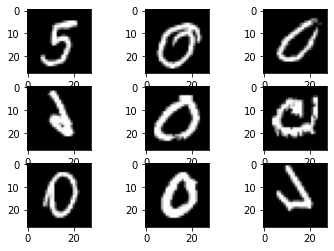

In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape our data to be in the forma [samples, width, height, color_depth]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Change datatype to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# define data preparation
train_datagen = ImageDataGenerator(vertical_flip=True,
                                   horizontal_flip=True)

# fit parameters from data
train_datagen.fit(x_train)

# configure batch size and retrieve one batch of images
for x_batch, y_batch in train_datagen.flow(x_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))# show the plot
    pyplot.show()
    break

**Random Shifts**

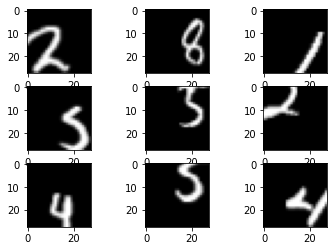

In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape our data to be in the forma [samples, width, height, color_depth]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Change datatype to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# define data preparation
train_datagen = ImageDataGenerator(width_shift_range=0.3,
                                height_shift_range=0.3,)

# fit parameters from data
train_datagen.fit(x_train)

# configure batch size and retrieve one batch of images
for x_batch, y_batch in train_datagen.flow(x_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))# show the plot
    pyplot.show()
    break

When we are usinf flow we need to have array of rank 4. flow is iterating infine time therefore we will do it till 35 images and then break it.

Process is--> (Take data---image generator--functionality--fit--image generator will give batches when use flow--images generated.)

It generates images but will not save the images (images's aren't created and dumped to a directory ---> which will be wasteful storage)

To prevent overfitting we can use data augmentation(model is memorizing it will learn everything but when data augmentation is applied its getting variation therefore it will get it as new data and model will be not overfit (its kind of preprocessing we are doing it in input ) 

**Combining All**

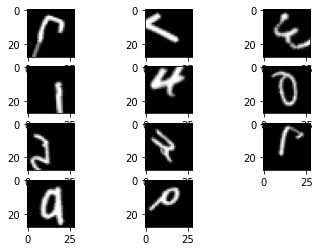

In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape our data to be in the forma [samples, width, height, color_depth]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Change datatype to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# define data preparation
train_datagen = ImageDataGenerator(
        rotation_range=45,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# fit parameters from data
train_datagen.fit(x_train)

# configure batch size and retrieve one batch of images
for x_batch, y_batch in train_datagen.flow(x_train, y_train, batch_size=12):
    # create a grid of 3x3 images
    for i in range(1, 12):
        pyplot.subplot(4,3,i)
        pyplot.imshow(x_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))# show the plot
    pyplot.show()
    break


**Test Augmentation on a single image**

* Outputs to ./preview diretory

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.6,
        height_shift_range=0.7,
        shear_range=0.5,
        zoom_range=0.3,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/images.jpg')  
x = img_to_array(img)  # creating a Numpy array with shape (3, 150, 150)

x = x.reshape((1,) + x.shape)  # converting to a Numpy array with shape (1, 3, 150, 150) we need 4 dim array there we are adding 1(1=1 image) more dim and x.shape 
print(x.shape)

i = 0
for xbatch in datagen.flow(x, save_to_dir='/content/sample_data', save_prefix='imagedemo', save_format='jpg',batch_size=32):  #batch_size will be defined here
  if i>=20:
    break

(1, 205, 246, 3)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Keras provides the **ImageDataGenerator** class that defines the configuration for image data preparation and augmentation. This includes capabilities such as:

* Sample-wise standardization.
* Feature-wise standardization.
* ZCA whitening.
* Random rotation, shifts, shear and flips.
* Dimension reordering.
* Save augmented images to disk.

In [ ]:
datagen = ImageDataGenerator()

Rather than performing the operations on your entire image dataset in memory, the API is designed to be iterated by the deep learning model fitting process, creating augmented image data for you just-in-time. 

This reduces your memory overhead, but adds some additional time cost during model training.

After you have created and configured your ImageDataGenerator, you must fit it on your data. 

This will calculate any statistics required to actually perform the transforms to your image data. 

You can do this by calling the **fit()** function on the data generator and pass it your training dataset.

In [ ]:
datagen.fit(train)

The data generator itself is in fact an iterator, returning batches of image samples when requested. 

We can configure the batch size and prepare the data generator and get batches of images by calling the **flow()** function.

In [ ]:
X_batch, y_batch = datagen.flow(train, train, batch_size=32)

Finally we can make use of the data generator. Instead of calling the fit()   function on our model, we must call the fit_generator()  function and pass in the data generator and the desired length of an epoch as well as the total number of epochs on which to train.

In [ ]:
fit_generator(datagen, samples_per_epoch=len(train), epochs=100)